In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
from sklearn.decomposition import LatentDirichletAllocation


In [7]:
import pandas as pd
import numpy as np

C:\Users\Yash\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Yash\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
df = pd.read_csv('BA_reviews.csv')
df

Unnamed: 0                                            reviews
0              0  Not Verified |   I flew from Malaga via LHR to...
1              1  ✅ Trip Verified |  Milan to Miami return via L...
2              2  ✅ Trip Verified |  BA created a new low-cost s...
3              3  ✅ Trip Verified |   I flew with British Airway...
4              4  ✅ Trip Verified |  Manchester to Copenhagen vi...
...          ...                                                ...
3790        3790  YYZ to LHR - July 2012 - I flew overnight in p...
3791        3791  LHR to HAM. Purser addresses all club passenge...
3792        3792  My son who had worked for British Airways urge...
3793        3793  London City-New York JFK via Shannon on A318 b...
3794        3794  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3795 rows x 2 columns]

In [9]:
df= df.drop(columns=['Unnamed: 0'])

In [10]:
df

reviews
0     Not Verified |   I flew from Malaga via LHR to...
1     ✅ Trip Verified |  Milan to Miami return via L...
2     ✅ Trip Verified |  BA created a new low-cost s...
3     ✅ Trip Verified |   I flew with British Airway...
4     ✅ Trip Verified |  Manchester to Copenhagen vi...
...                                                 ...
3790  YYZ to LHR - July 2012 - I flew overnight in p...
3791  LHR to HAM. Purser addresses all club passenge...
3792  My son who had worked for British Airways urge...
3793  London City-New York JFK via Shannon on A318 b...
3794  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3795 rows x 1 columns]

In [11]:
review_1 = df['reviews'][1].split('|')
review_1[0]

'✅ Trip Verified '

In [12]:
len(review_1)

2

In [13]:
review_0 = df['reviews'][0].split('|')
review_0

['Not Verified ',
 '   I flew from Malaga via LHR to Boston on the 4th May 2024 and on arrival in Boston discovered my luggage was still in London. Filed a report and now 4 days later no sign of the luggage. The baggage customer service is a joke. Not interested in the clients or giving a good service. Updates are useless. I know my luggage has been sitting in Boston since the 5th as I have an air tag inside it. The airline seem to have no intention of getting my luggage to me. The robots on FB messenger & twitter are useless. I opened a complaint & when I checked the update of my complaint the case had been closed despite never been contacted by a human!! This airline is now a joke and if I ever get my luggage back I doubt I will ever fly with them again. They are now worse than Air Canada in my book and that is saying something.']

In [14]:
df['Verification'] = df['reviews'].str.split('|').str[0]

In [15]:
df

reviews  \
0     Not Verified |   I flew from Malaga via LHR to...   
1     ✅ Trip Verified |  Milan to Miami return via L...   
2     ✅ Trip Verified |  BA created a new low-cost s...   
3     ✅ Trip Verified |   I flew with British Airway...   
4     ✅ Trip Verified |  Manchester to Copenhagen vi...   
...                                                 ...   
3790  YYZ to LHR - July 2012 - I flew overnight in p...   
3791  LHR to HAM. Purser addresses all club passenge...   
3792  My son who had worked for British Airways urge...   
3793  London City-New York JFK via Shannon on A318 b...   
3794  SIN-LHR BA12 B747-436 First Class. Old aircraf...   

                                           Verification  
0                                         Not Verified   
1                                      ✅ Trip Verified   
2                                      ✅ Trip Verified   
3                                      ✅ Trip Verified   
4                                      ✅ Trip Verified   
...                                                 ...  
3790  YYZ to LHR - July 2012 - I flew overnight in p...  
3791  LHR to HAM. Purser addresses all club passenge...  
3792  My son who had worked for British Airways urge...  
3793  London City-New York JFK via Shannon on A318 b...  
3794  SIN-LHR BA12 B747-436 First Class. Old aircraf...  

[3795 rows x 2 columns]

In [16]:
df['Verification'].unique()

array(['Not Verified ', '✅ Trip Verified ', 'cNot Verified ', ...,
       'My son who had worked for British Airways urged me to fly British Airways to Kansas City. He recommended me to join the executive club. I went ahead and booked my flight back in May. Very reasonable price. As they are in an alliance with American Airlines my outward journey was with American Airlines. They were helpful even booking my seats to Chicago then onto Kansas at no cost. Problem was on my return. I duly waited to book my seat on the Chicago flight 24 hours prior to check-in. As this was with BA I tried for an hour to choose a seat to no avail. My itinerary came up but told me I was being redirected to American. So I called BA they told me I was to check in at Kansas City before I could have a seat assigned. So I called American a very unhelpful person told me that I had to go to back to BA. I called BA again after explaining I had seat booked with American from Kansas but could not get one with BA she p

In [17]:
df['Verification'] = df['Verification'].replace('cNot Verified ', 'Not Verified ')

In [18]:
df['Verification'].unique()

array(['Not Verified ', '✅ Trip Verified ', '❎ Not Verified ', ...,
       'My son who had worked for British Airways urged me to fly British Airways to Kansas City. He recommended me to join the executive club. I went ahead and booked my flight back in May. Very reasonable price. As they are in an alliance with American Airlines my outward journey was with American Airlines. They were helpful even booking my seats to Chicago then onto Kansas at no cost. Problem was on my return. I duly waited to book my seat on the Chicago flight 24 hours prior to check-in. As this was with BA I tried for an hour to choose a seat to no avail. My itinerary came up but told me I was being redirected to American. So I called BA they told me I was to check in at Kansas City before I could have a seat assigned. So I called American a very unhelpful person told me that I had to go to back to BA. I called BA again after explaining I had seat booked with American from Kansas but could not get one with BA she 

In [19]:
for i in range(0, len(df['Verification'])):
    a = df['Verification'][i].split(' ')
    
    print(a)

['Not', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['Not', 'Verified', '']
['Not', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['Not', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['Not', 'Verified', '']
['Not', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['Not', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['Not', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['Not', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['✅', 'Trip', 'Verified', '']
['Not', 'Verified', '']
['Not', 'V

In [20]:
def starts_with_tick(string):
    return string[0]=='✅'
df['Verification'] = df['Verification'].apply(lambda x: 1 if starts_with_tick(x) else 0)

In [21]:
df

reviews  Verification
0     Not Verified |   I flew from Malaga via LHR to...             0
1     ✅ Trip Verified |  Milan to Miami return via L...             1
2     ✅ Trip Verified |  BA created a new low-cost s...             1
3     ✅ Trip Verified |   I flew with British Airway...             1
4     ✅ Trip Verified |  Manchester to Copenhagen vi...             1
...                                                 ...           ...
3790  YYZ to LHR - July 2012 - I flew overnight in p...             0
3791  LHR to HAM. Purser addresses all club passenge...             0
3792  My son who had worked for British Airways urge...             0
3793  London City-New York JFK via Shannon on A318 b...             0
3794  SIN-LHR BA12 B747-436 First Class. Old aircraf...             0

[3795 rows x 2 columns]

In [22]:
df['Verification'].value_counts()

Verification
1    1992
0    1803
Name: count, dtype: int64

# PreProcessing

In [23]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [24]:
stop_words = stopwords.words("english")
stop_words.extend(['british','airways','flight','ba','airline','verified'])
stop = set(stop_words)
#stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [25]:
corpus = df['reviews']

In [26]:
corpus

0       Not Verified |   I flew from Malaga via LHR to...
1       ✅ Trip Verified |  Milan to Miami return via L...
2       ✅ Trip Verified |  BA created a new low-cost s...
3       ✅ Trip Verified |   I flew with British Airway...
4       ✅ Trip Verified |  Manchester to Copenhagen vi...
                              ...                        
3790    YYZ to LHR - July 2012 - I flew overnight in p...
3791    LHR to HAM. Purser addresses all club passenge...
3792    My son who had worked for British Airways urge...
3793    London City-New York JFK via Shannon on A318 b...
3794    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3795, dtype: object

In [27]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

clean_corpus = [clean(doc).split() for doc in corpus]
data_lemmatized = [clean(doc) for doc in corpus]

In [28]:
clean_corpus

[['flew',
  'malaga',
  'via',
  'lhr',
  'boston',
  '4th',
  'may',
  '2024',
  'arrival',
  'boston',
  'discovered',
  'luggage',
  'still',
  'london',
  'filed',
  'report',
  '4',
  'day',
  'later',
  'sign',
  'luggage',
  'baggage',
  'customer',
  'service',
  'joke',
  'interested',
  'client',
  'giving',
  'good',
  'service',
  'update',
  'useless',
  'know',
  'luggage',
  'sitting',
  'boston',
  'since',
  '5th',
  'air',
  'tag',
  'inside',
  'it',
  'seem',
  'intention',
  'getting',
  'luggage',
  'me',
  'robot',
  'fb',
  'messenger',
  'twitter',
  'useless',
  'opened',
  'complaint',
  'checked',
  'update',
  'complaint',
  'case',
  'closed',
  'despite',
  'never',
  'contacted',
  'human',
  'joke',
  'ever',
  'get',
  'luggage',
  'back',
  'doubt',
  'ever',
  'fly',
  'again',
  'worse',
  'air',
  'canada',
  'book',
  'saying',
  'something'],
 ['✅',
  'trip',
  'milan',
  'miami',
  'return',
  'via',
  'london',
  'worst',
  'business',
  'class

In [71]:
data_lemmatized

['flew malaga via lhr boston 4th may 2024 arrival boston discovered luggage still london filed report 4 day later sign luggage baggage customer service joke interested client giving good service update useless know luggage sitting boston since 5th air tag inside it seem intention getting luggage me robot fb messenger twitter useless opened complaint checked update complaint case closed despite never contacted human joke ever get luggage back doubt ever fly again worse air canada book saying something',
 '✅ trip milan miami return via london worst business class ever layout a380 crazy width seat outrageous aisle seat shame ba length ok jump leg another passenger heshe sleeping mode unbelievable system divider reach seat crew absurd awful never layout meal average lhr mia return quite good unfortunately ba flew march qatar business class comparable highlight difference row 8 seat qr 4 seat that’s it top that service quite strange mainly due divider above boarding procedure look well orga

In [29]:
#from gensim import corpora

#dictionary = corpora.Dictionary(clean_corpus)
#doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

In [30]:
#pip install gensim

In [31]:
#len(doc_term_matrix)

# Latent Sentiment Analysis

In [142]:
from gensim.models import LsiModel

lsa = LsiModel(doc_term_matrix, num_topics=10, id2word = dictionary)
print(lsa.print_topics(num_topics=10, num_words=10))

[(0, '0.375*"seat" + 0.225*"service" + 0.197*"flight" + 0.180*"time" + 0.166*"food" + 0.165*"crew" + 0.163*"class" + 0.156*"cabin" + 0.145*"good" + 0.137*"hour"'), (1, '0.566*"seat" + -0.217*"hour" + 0.206*"class" + -0.192*"u" + -0.157*"day" + 0.154*"business" + -0.152*"told" + -0.141*"customer" + -0.134*"flight" + -0.125*"airport"'), (2, '0.564*"seat" + -0.306*"crew" + -0.234*"good" + -0.219*"service" + -0.203*"food" + -0.193*"cabin" + -0.158*"lounge" + -0.145*"drink" + 0.133*"get" + 0.125*"told"'), (3, '-0.657*"class" + -0.497*"business" + 0.268*"seat" + -0.257*"first" + 0.160*"good" + 0.122*"crew" + 0.109*"time" + -0.086*"lounge" + 0.086*"drink" + -0.073*"customer"'), (4, '-0.654*"service" + 0.226*"time" + -0.226*"customer" + -0.221*"economy" + 0.176*"lounge" + 0.172*"first" + -0.134*"premium" + 0.122*"boarding" + 0.118*"good" + 0.110*"plane"'), (5, '0.433*"crew" + 0.419*"cabin" + -0.359*"good" + -0.311*"flight" + 0.243*"passenger" + -0.167*"london" + -0.159*"food" + -0.157*"lounge"

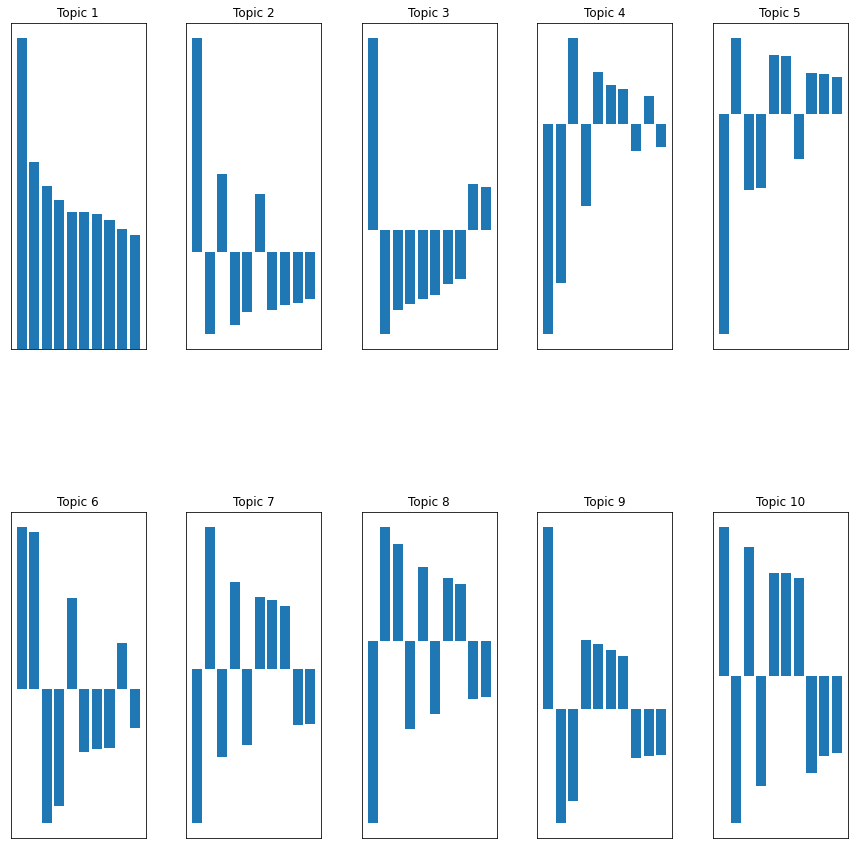

<Figure size 2160x1440 with 0 Axes>

In [146]:
topics = lsa.show_topics(formatted=False)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 15), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, ax in enumerate(axes.flat):
    topic = topics[i]
    ax.bar([str(t[0]) for t in topic[1]], [t[1] for t in topic[1]])
    ax.set_title(f"Topic {i+1}")

plt.figure(figsize=(30,20))
plt.show()

# Latent Dirichlet Allocation

In [148]:
from gensim.models import LdaModel

lda = LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)
print(lda.print_topics(num_topics=5, num_words=10))

[(0, '0.017*"seat" + 0.009*"flight" + 0.008*"service" + 0.008*"london" + 0.007*"back" + 0.007*"economy" + 0.007*"food" + 0.007*"time" + 0.006*"heathrow" + 0.005*"good"'), (1, '0.015*"seat" + 0.014*"good" + 0.013*"service" + 0.012*"crew" + 0.010*"food" + 0.009*"cabin" + 0.008*"time" + 0.008*"london" + 0.007*"flight" + 0.005*"meal"'), (2, '0.014*"seat" + 0.009*"time" + 0.009*"service" + 0.008*"flight" + 0.008*"cabin" + 0.008*"hour" + 0.007*"would" + 0.007*"food" + 0.007*"class" + 0.007*"one"'), (3, '0.022*"seat" + 0.010*"class" + 0.009*"business" + 0.009*"flight" + 0.007*"service" + 0.007*"get" + 0.007*"food" + 0.006*"time" + 0.006*"crew" + 0.005*"plane"'), (4, '0.009*"flight" + 0.009*"seat" + 0.008*"staff" + 0.006*"service" + 0.006*"class" + 0.006*"london" + 0.005*"hour" + 0.005*"first" + 0.005*"good" + 0.005*"✅"')]


In [111]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [112]:
lda_model = LatentDirichletAllocation(n_components=4,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model) 

LatentDirichletAllocation(learning_method='online', n_components=4, n_jobs=-1,
                          random_state=100)


In [113]:
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [114]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

Topic Num  Num Documents
0          3           2577
1          0            736
2          2            313
3          1            169

In [115]:
print(lda.print_topics())
doc_lda = lda[doc_term_matrix]

[(0, '0.011*"seat" + 0.010*"hour" + 0.009*"flight" + 0.009*"crew" + 0.008*"time" + 0.008*"service" + 0.008*"london" + 0.007*"staff" + 0.007*"back" + 0.006*"first"'), (1, '0.012*"good" + 0.011*"club" + 0.010*"service" + 0.009*"passenger" + 0.009*"flight" + 0.008*"time" + 0.007*"food" + 0.007*"europe" + 0.007*"seat" + 0.007*"drink"'), (2, '0.023*"seat" + 0.014*"food" + 0.010*"flight" + 0.010*"class" + 0.009*"service" + 0.008*"time" + 0.008*"good" + 0.007*"crew" + 0.007*"london" + 0.007*"cabin"'), (3, '0.013*"service" + 0.009*"staff" + 0.009*"seat" + 0.008*"one" + 0.007*"flight" + 0.007*"food" + 0.007*"time" + 0.006*"hour" + 0.006*"heathrow" + 0.006*"customer"'), (4, '0.008*"seat" + 0.008*"get" + 0.006*"would" + 0.006*"flight" + 0.006*"one" + 0.005*"crew" + 0.005*"service" + 0.005*"london" + 0.005*"plane" + 0.005*"even"'), (5, '0.009*"service" + 0.009*"flight" + 0.008*"seat" + 0.008*"customer" + 0.006*"lhr" + 0.006*"✅" + 0.006*"staff" + 0.006*"time" + 0.005*"london" + 0.005*"2"'), (6, '0.

In [116]:
from gensim.models import LdaMulticore
lda_model =  LdaMulticore(doc_term_matrix, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [117]:
print(lda_model.print_topics())

[(0, '0.010*"service" + 0.008*"staff" + 0.008*"time" + 0.007*"passenger" + 0.006*"crew" + 0.006*"first" + 0.006*"class" + 0.006*"cabin" + 0.006*"seat" + 0.006*"would"'), (1, '0.009*"seat" + 0.009*"would" + 0.008*"one" + 0.007*"flight" + 0.006*"time" + 0.006*"staff" + 0.006*"luggage" + 0.006*"trip" + 0.006*"hour" + 0.005*"get"'), (2, '0.011*"good" + 0.011*"crew" + 0.011*"service" + 0.010*"time" + 0.010*"lounge" + 0.009*"cabin" + 0.009*"food" + 0.009*"drink" + 0.008*"seat" + 0.008*"meal"'), (3, '0.012*"time" + 0.010*"flight" + 0.008*"crew" + 0.007*"class" + 0.007*"minute" + 0.007*"cabin" + 0.006*"passenger" + 0.006*"london" + 0.005*"boarding" + 0.005*"one"'), (4, '0.013*"hour" + 0.010*"u" + 0.010*"flight" + 0.009*"customer" + 0.009*"service" + 0.009*"london" + 0.008*"day" + 0.008*"told" + 0.008*"✅" + 0.008*"trip"'), (5, '0.021*"seat" + 0.011*"crew" + 0.009*"cabin" + 0.008*"service" + 0.008*"time" + 0.007*"food" + 0.007*"one" + 0.007*"flight" + 0.006*"passenger" + 0.005*"meal"'), (6, '0.0

# Sentiment Analysis

In [32]:
df.Verification.value_counts()

Verification
1    1992
0    1803
Name: count, dtype: int64

In [33]:
df.Verification.value_counts()/len(df)

Verification
1    0.524901
0    0.475099
Name: count, dtype: float64

In [34]:
length_reviews = df.reviews.str.len()
length_reviews

0        836
1        839
2       2618
3       1460
4       1258
        ... 
3790     623
3791     144
3792    1171
3793     188
3794     679
Name: reviews, Length: 3795, dtype: int64

In [35]:
min(length_reviews)

83

In [36]:
max(length_reviews)

3537

# Textblob Sentiment Analysis

In [37]:
from textblob import TextBlob

sentiment_score = []
for i in range(0,len(corpus)):
    valence = TextBlob(corpus[i])
    sentiment_score.append(valence.sentiment)
print(sentiment_score)

[Sentiment(polarity=-0.06041666666666668, subjectivity=0.3), Sentiment(polarity=-0.24722222222222223, subjectivity=0.6383680555555556), Sentiment(polarity=0.07240196078431373, subjectivity=0.5317067736185384), Sentiment(polarity=0.026960784313725488, subjectivity=0.36911764705882355), Sentiment(polarity=-0.0794927536231884, subjectivity=0.5378985507246378), Sentiment(polarity=-0.15, subjectivity=0.31428571428571433), Sentiment(polarity=0.04000000000000001, subjectivity=0.4033333333333333), Sentiment(polarity=-0.0005662805662805571, subjectivity=0.47222651222651224), Sentiment(polarity=-0.59375, subjectivity=0.6666666666666666), Sentiment(polarity=-0.04174744897959184, subjectivity=0.4024957482993197), Sentiment(polarity=0.07812499999999999, subjectivity=0.48749999999999993), Sentiment(polarity=-0.05565476190476191, subjectivity=0.37529761904761905), Sentiment(polarity=-0.20275482093663913, subjectivity=0.3829889807162534), Sentiment(polarity=0.1263888888888889, subjectivity=0.316666666

In [38]:
blob = pd.DataFrame(sentiment_score)
blob = blob.reset_index().rename(columns = {'index':'Id'})

In [39]:
df = df.reset_index().rename(columns = {'index':'Id'})

# Vader Sentiment Analysis

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
vsentiment_score = []
for i in range(0, len(corpus)):
    valence = analyzer.polarity_scores(corpus[i])
    vsentiment_score.append(valence)
print(vsentiment_score)

[{'neg': 0.123, 'neu': 0.825, 'pos': 0.052, 'compound': -0.903}, {'neg': 0.139, 'neu': 0.766, 'pos': 0.095, 'compound': -0.8422}, {'neg': 0.073, 'neu': 0.799, 'pos': 0.127, 'compound': 0.9861}, {'neg': 0.078, 'neu': 0.905, 'pos': 0.018, 'compound': -0.9381}, {'neg': 0.095, 'neu': 0.803, 'pos': 0.102, 'compound': -0.0754}, {'neg': 0.088, 'neu': 0.848, 'pos': 0.064, 'compound': -0.4401}, {'neg': 0.092, 'neu': 0.879, 'pos': 0.029, 'compound': -0.9407}, {'neg': 0.159, 'neu': 0.74, 'pos': 0.101, 'compound': -0.9777}, {'neg': 0.274, 'neu': 0.726, 'pos': 0.0, 'compound': -0.9563}, {'neg': 0.053, 'neu': 0.896, 'pos': 0.051, 'compound': -0.761}, {'neg': 0.079, 'neu': 0.826, 'pos': 0.095, 'compound': 0.7349}, {'neg': 0.099, 'neu': 0.893, 'pos': 0.008, 'compound': -0.9474}, {'neg': 0.172, 'neu': 0.794, 'pos': 0.034, 'compound': -0.9414}, {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.97}, {'neg': 0.054, 'neu': 0.642, 'pos': 0.304, 'compound': 0.9826}, {'neg': 0.099, 'neu': 0.81, 'pos': 0.09

In [41]:
vader = pd.DataFrame(vsentiment_score)
vader = vader.reset_index().rename(columns = {'index':'Id'})

In [43]:
df_main = blob.merge(df, how='left')

In [44]:
df = vader.merge(df_main, how='left')

# Wordcloud

In [130]:
#?WordCloud

In [38]:
clean_text = [' '.join(doc) for doc in clean_corpus]
clean_combine_text = ' '.join(clean_text)

In [39]:
clean_combine_text

'flew malaga via lhr boston 4th may 2024 arrival boston discovered luggage still london filed report 4 day later sign luggage baggage customer service joke interested client giving good service update useless know luggage sitting boston since 5th air tag inside it seem intention getting luggage me robot fb messenger twitter useless opened complaint checked update complaint case closed despite never contacted human joke ever get luggage back doubt ever fly again worse air canada book saying something ✅ trip milan miami return via london worst business class ever layout a380 crazy width seat outrageous aisle seat shame ba length ok jump leg another passenger heshe sleeping mode unbelievable system divider reach seat crew absurd awful never layout meal average lhr mia return quite good unfortunately ba flew march qatar business class comparable highlight difference row 8 seat qr 4 seat that’s it top that service quite strange mainly due divider above boarding procedure look well organized

In [40]:
#stopwords = set(STOPWORDS)
cloud = WordCloud(max_words = 500, width = 800, height = 400, 
                  background_color='black').generate(clean_combine_text)

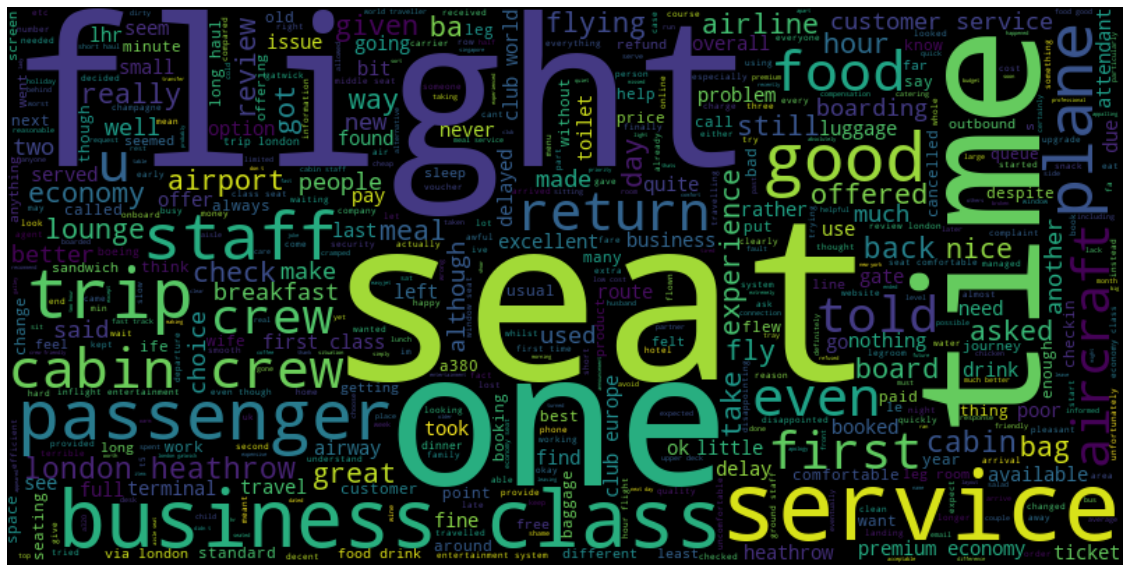

In [41]:
plt.figure(figsize=(20,12))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Roberta Training Model

In [82]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
#MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
#tokenizer = AutoTokenizer.from_pretrained(MODEL)
#model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
#!pip install transformers requests beautifulsoup4

In [ ]:
encoded_text = tokenizer(df['reviews'][0], return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

In [ ]:
'''def polarity_score_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict'''

In [ ]:
'''res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['reviews']
        myid = row['Id']
        roberta_result = polarity_score_roberta(text)
    except (RuntimeError, IndexError) as e:
        print(f'Skipping row and id number: {myid}')'''

# Bert Neural Network

In [99]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [83]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

C:\Users\Yash\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [127]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [128]:
type(df['reviews'])

pandas.core.series.Series

In [129]:
sentiment_score(df['reviews'][1])

1

In [130]:
df['bert_sentiment'] = df['reviews'].apply(lambda x: sentiment_score(x[:512]))


In [131]:
df['bert_sentiment'][514]

4

In [132]:
df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'compound', 'polarity',
       'subjectivity', 'reviews', 'Verification', 'vader_sentiment',
       'tb_polarity', 'bert_sentiment'],
      dtype='object')

In [51]:
df = df.rename(columns = {'vader neg' : 'vader_neg',
                         'vader neu' : 'vader_neu',
                         'vader pos' : 'vader_pos'})

In [52]:
df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'compound', 'polarity',
       'subjectivity', 'reviews', 'Verification'],
      dtype='object')

In [133]:
df.head()

Id  vader_neg  vader_neu  vader_pos  compound  polarity  subjectivity  \
0   0      0.123      0.825      0.052   -0.9030 -0.060417      0.300000   
1   1      0.139      0.766      0.095   -0.8422 -0.247222      0.638368   
2   2      0.073      0.799      0.127    0.9861  0.072402      0.531707   
3   3      0.078      0.905      0.018   -0.9381  0.026961      0.369118   
4   4      0.095      0.803      0.102   -0.0754 -0.079493      0.537899   

                                             reviews  Verification  \
0  Not Verified |   I flew from Malaga via LHR to...             0   
1  ✅ Trip Verified |  Milan to Miami return via L...             1   
2  ✅ Trip Verified |  BA created a new low-cost s...             1   
3  ✅ Trip Verified |   I flew with British Airway...             1   
4  ✅ Trip Verified |  Manchester to Copenhagen vi...             1   

  vader_sentiment tb_polarity  bert_sentiment  
0               N           N               1  
1               N           N               1  
2               P           P               2  
3               N         Neu               2  
4               N           N               3

In [64]:
df.to_excel('powerbi.xlsx',index=False)

C:\Users\Yash\AppData\Local\Temp\ipykernel_15552\1502108311.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel('powerbi.xlsx',index=False)


In [65]:
min(df['compound'])

-0.9975

In [67]:
max(df['compound'])

0.9992

In [69]:
def map_sentiment(compound):
    if compound > 0.05:
        return 'P'
    elif compound < -0.05:
        return 'N'
    else:
        return 'Neu'
df['vader_sentiment'] = df['compound'].apply(map_sentiment)

In [70]:
df

Id  vader_neg  vader_neu  vader_pos  compound  polarity  subjectivity  \
0        0      0.123      0.825      0.052   -0.9030 -0.060417      0.300000   
1        1      0.139      0.766      0.095   -0.8422 -0.247222      0.638368   
2        2      0.073      0.799      0.127    0.9861  0.072402      0.531707   
3        3      0.078      0.905      0.018   -0.9381  0.026961      0.369118   
4        4      0.095      0.803      0.102   -0.0754 -0.079493      0.537899   
...    ...        ...        ...        ...       ...       ...           ...   
3790  3790      0.074      0.842      0.084    0.0933  0.281818      0.544697   
3791  3791      0.000      0.721      0.279    0.8720  0.173214      0.428571   
3792  3792      0.045      0.885      0.071    0.6640  0.143148      0.282222   
3793  3793      0.000      0.718      0.282    0.9148  0.351667      0.446667   
3794  3794      0.098      0.809      0.093    0.2244 -0.018084      0.529819   

                                                reviews  Verification  \
0     Not Verified |   I flew from Malaga via LHR to...             0   
1     ✅ Trip Verified |  Milan to Miami return via L...             1   
2     ✅ Trip Verified |  BA created a new low-cost s...             1   
3     ✅ Trip Verified |   I flew with British Airway...             1   
4     ✅ Trip Verified |  Manchester to Copenhagen vi...             1   
...                                                 ...           ...   
3790  YYZ to LHR - July 2012 - I flew overnight in p...             0   
3791  LHR to HAM. Purser addresses all club passenge...             0   
3792  My son who had worked for British Airways urge...             0   
3793  London City-New York JFK via Shannon on A318 b...             0   
3794  SIN-LHR BA12 B747-436 First Class. Old aircraf...             0   

     vader_sentiment  
0                  N  
1                  N  
2                  P  
3                  N  
4                  N  
...              ...  
3790               P  
3791               P  
3792               P  
3793               P  
3794               P  

[3795 rows x 10 columns]

In [75]:
def map_polarity(polarity):
    if polarity > 0.05:
        return 'P'
    elif polarity < -0.05:
        return 'N'
    else:
        return 'Neu'
df['tb_polarity'] = df['polarity'].apply(map_polarity)

In [76]:
df

Id  vader_neg  vader_neu  vader_pos  compound  polarity  subjectivity  \
0        0      0.123      0.825      0.052   -0.9030 -0.060417      0.300000   
1        1      0.139      0.766      0.095   -0.8422 -0.247222      0.638368   
2        2      0.073      0.799      0.127    0.9861  0.072402      0.531707   
3        3      0.078      0.905      0.018   -0.9381  0.026961      0.369118   
4        4      0.095      0.803      0.102   -0.0754 -0.079493      0.537899   
...    ...        ...        ...        ...       ...       ...           ...   
3790  3790      0.074      0.842      0.084    0.0933  0.281818      0.544697   
3791  3791      0.000      0.721      0.279    0.8720  0.173214      0.428571   
3792  3792      0.045      0.885      0.071    0.6640  0.143148      0.282222   
3793  3793      0.000      0.718      0.282    0.9148  0.351667      0.446667   
3794  3794      0.098      0.809      0.093    0.2244 -0.018084      0.529819   

                                                reviews  Verification  \
0     Not Verified |   I flew from Malaga via LHR to...             0   
1     ✅ Trip Verified |  Milan to Miami return via L...             1   
2     ✅ Trip Verified |  BA created a new low-cost s...             1   
3     ✅ Trip Verified |   I flew with British Airway...             1   
4     ✅ Trip Verified |  Manchester to Copenhagen vi...             1   
...                                                 ...           ...   
3790  YYZ to LHR - July 2012 - I flew overnight in p...             0   
3791  LHR to HAM. Purser addresses all club passenge...             0   
3792  My son who had worked for British Airways urge...             0   
3793  London City-New York JFK via Shannon on A318 b...             0   
3794  SIN-LHR BA12 B747-436 First Class. Old aircraf...             0   

     vader_sentiment tb_polarity  
0                  N           N  
1                  N           N  
2                  P           P  
3                  N         Neu  
4                  N           N  
...              ...         ...  
3790               P           P  
3791               P           P  
3792               P           P  
3793               P           P  
3794               P         Neu  

[3795 rows x 11 columns]

In [78]:
import seaborn as sns

In [79]:
grouped = df.groupby('Verification').agg({'vader_sentiment':'value_counts','tb_polarity':'value_counts'})

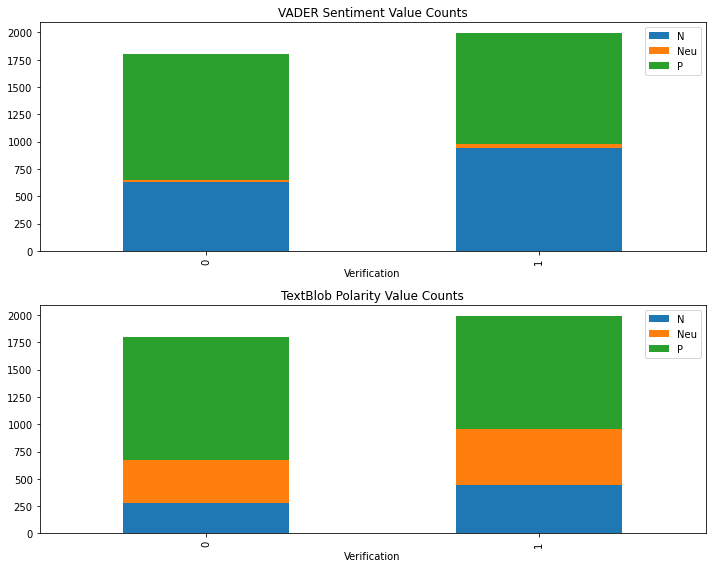

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

grouped['vader_sentiment'].unstack().plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title('VADER Sentiment Value Counts')

grouped['tb_polarity'].unstack().plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('TextBlob Polarity Value Counts')

plt.tight_layout()
plt.show()

In [90]:
df = df.reset_index()

In [92]:
df = df.drop(columns = ['index'])

In [93]:
df

Id  vader_neg  vader_neu  vader_pos  compound  polarity  subjectivity  \
0        0      0.123      0.825      0.052   -0.9030 -0.060417      0.300000   
1        1      0.139      0.766      0.095   -0.8422 -0.247222      0.638368   
2        2      0.073      0.799      0.127    0.9861  0.072402      0.531707   
3        3      0.078      0.905      0.018   -0.9381  0.026961      0.369118   
4        4      0.095      0.803      0.102   -0.0754 -0.079493      0.537899   
...    ...        ...        ...        ...       ...       ...           ...   
3790  3790      0.074      0.842      0.084    0.0933  0.281818      0.544697   
3791  3791      0.000      0.721      0.279    0.8720  0.173214      0.428571   
3792  3792      0.045      0.885      0.071    0.6640  0.143148      0.282222   
3793  3793      0.000      0.718      0.282    0.9148  0.351667      0.446667   
3794  3794      0.098      0.809      0.093    0.2244 -0.018084      0.529819   

                                                reviews  Verification  \
0     Not Verified |   I flew from Malaga via LHR to...             0   
1     ✅ Trip Verified |  Milan to Miami return via L...             1   
2     ✅ Trip Verified |  BA created a new low-cost s...             1   
3     ✅ Trip Verified |   I flew with British Airway...             1   
4     ✅ Trip Verified |  Manchester to Copenhagen vi...             1   
...                                                 ...           ...   
3790  YYZ to LHR - July 2012 - I flew overnight in p...             0   
3791  LHR to HAM. Purser addresses all club passenge...             0   
3792  My son who had worked for British Airways urge...             0   
3793  London City-New York JFK via Shannon on A318 b...             0   
3794  SIN-LHR BA12 B747-436 First Class. Old aircraf...             0   

     vader_sentiment tb_polarity  
0                  N           N  
1                  N           N  
2                  P           P  
3                  N         Neu  
4                  N           N  
...              ...         ...  
3790               P           P  
3791               P           P  
3792               P           P  
3793               P           P  
3794               P         Neu  

[3795 rows x 11 columns]

In [109]:
df

Id  vader_neg  vader_neu  vader_pos  compound  polarity  subjectivity  \
0        0      0.123      0.825      0.052   -0.9030 -0.060417      0.300000   
1        1      0.139      0.766      0.095   -0.8422 -0.247222      0.638368   
2        2      0.073      0.799      0.127    0.9861  0.072402      0.531707   
3        3      0.078      0.905      0.018   -0.9381  0.026961      0.369118   
4        4      0.095      0.803      0.102   -0.0754 -0.079493      0.537899   
...    ...        ...        ...        ...       ...       ...           ...   
3790  3790      0.074      0.842      0.084    0.0933  0.281818      0.544697   
3791  3791      0.000      0.721      0.279    0.8720  0.173214      0.428571   
3792  3792      0.045      0.885      0.071    0.6640  0.143148      0.282222   
3793  3793      0.000      0.718      0.282    0.9148  0.351667      0.446667   
3794  3794      0.098      0.809      0.093    0.2244 -0.018084      0.529819   

                                                reviews  Verification  \
0     Not Verified |   I flew from Malaga via LHR to...             0   
1     ✅ Trip Verified |  Milan to Miami return via L...             1   
2     ✅ Trip Verified |  BA created a new low-cost s...             1   
3     ✅ Trip Verified |   I flew with British Airway...             1   
4     ✅ Trip Verified |  Manchester to Copenhagen vi...             1   
...                                                 ...           ...   
3790  YYZ to LHR - July 2012 - I flew overnight in p...             0   
3791  LHR to HAM. Purser addresses all club passenge...             0   
3792  My son who had worked for British Airways urge...             0   
3793  London City-New York JFK via Shannon on A318 b...             0   
3794  SIN-LHR BA12 B747-436 First Class. Old aircraf...             0   

     vader_sentiment tb_polarity bert_sentiment  
0                  N           N      tensor(1)  
1                  N           N      tensor(1)  
2                  P           P      tensor(2)  
3                  N         Neu      tensor(2)  
4                  N           N      tensor(3)  
...              ...         ...            ...  
3790               P           P      tensor(3)  
3791               P           P      tensor(4)  
3792               P           P      tensor(2)  
3793               P           P      tensor(4)  
3794               P         Neu      tensor(3)  

[3795 rows x 12 columns]

In [111]:
type(df['bert_sentiment'][1])

torch.Tensor

In [112]:
grouped_1 = df.groupby('Verification').agg({'bert_sentiment':'value_counts'})

In [113]:
grouped_1

bert_sentiment
Verification bert_sentiment                
0            tensor(1)                   12
             tensor(1)                    9
             tensor(1)                    9
             tensor(1)                    8
             tensor(1)                    8
...                                     ...
1            tensor(5)                    1
             tensor(5)                    1
             tensor(5)                    1
             tensor(5)                    1
             tensor(5)                    1

[2689 rows x 1 columns]

TypeError: 'AxesSubplot' object is not subscriptable

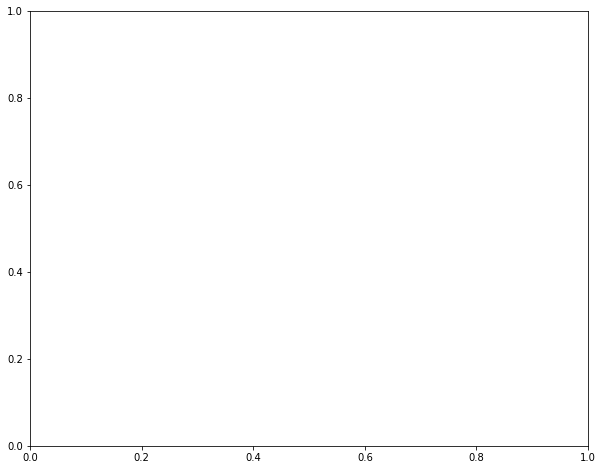

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

grouped_1['bert_sentiment'].unstack().plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title('Bert Sentiment Value Counts')

plt.tight_layout()
plt.show()

In [135]:
df.head()

Id  vader_neg  vader_neu  vader_pos  compound  polarity  subjectivity  \
0   0      0.123      0.825      0.052   -0.9030 -0.060417      0.300000   
1   1      0.139      0.766      0.095   -0.8422 -0.247222      0.638368   
2   2      0.073      0.799      0.127    0.9861  0.072402      0.531707   
3   3      0.078      0.905      0.018   -0.9381  0.026961      0.369118   
4   4      0.095      0.803      0.102   -0.0754 -0.079493      0.537899   

                                             reviews  Verification  \
0  Not Verified |   I flew from Malaga via LHR to...             0   
1  ✅ Trip Verified |  Milan to Miami return via L...             1   
2  ✅ Trip Verified |  BA created a new low-cost s...             1   
3  ✅ Trip Verified |   I flew with British Airway...             1   
4  ✅ Trip Verified |  Manchester to Copenhagen vi...             1   

  vader_sentiment tb_polarity  bert_sentiment  
0               N           N               1  
1               N           N               1  
2               P           P               2  
3               N         Neu               2  
4               N           N               3

In [136]:
df.to_excel('ot.xlsx',index=False)

C:\Users\Yash\AppData\Local\Temp\ipykernel_15552\92613248.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel('ot.xlsx',index=False)


In [137]:
df['bert_sentiment'].value_counts()

bert_sentiment
1    1497
2     779
4     743
3     471
5     305
Name: count, dtype: int64